# House Price Prediction using Linear Regression/ Gradient Descent

**Objective:** Predict house prices using property features such as size, bedrooms, and location.
**Dataset:** https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [ ]:
df = pd.read_csv('/content/Housing.csv')

In [ ]:
df.shape

(545, 13)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Checking for Missing Values

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


# Checking for Unique Values

In [ ]:
df.nunique()

,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


# Univariate Analysis

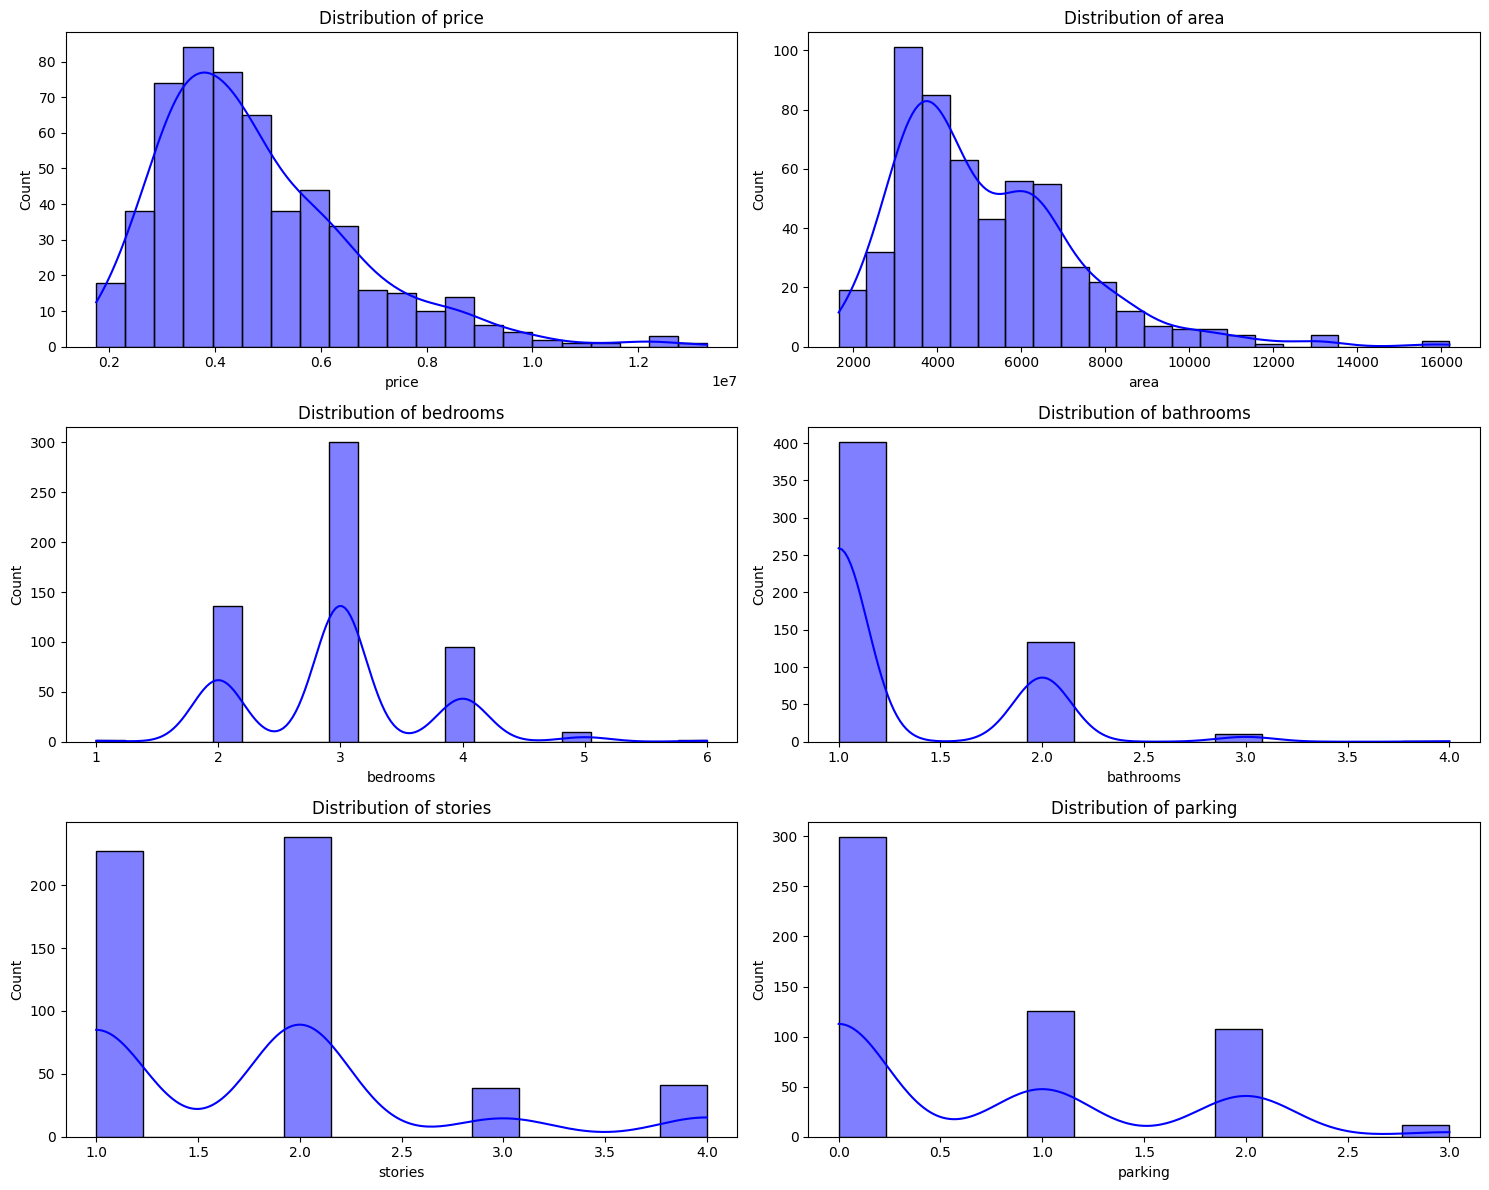

In [ ]:
# Univariate Analysis for Numerical Features
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

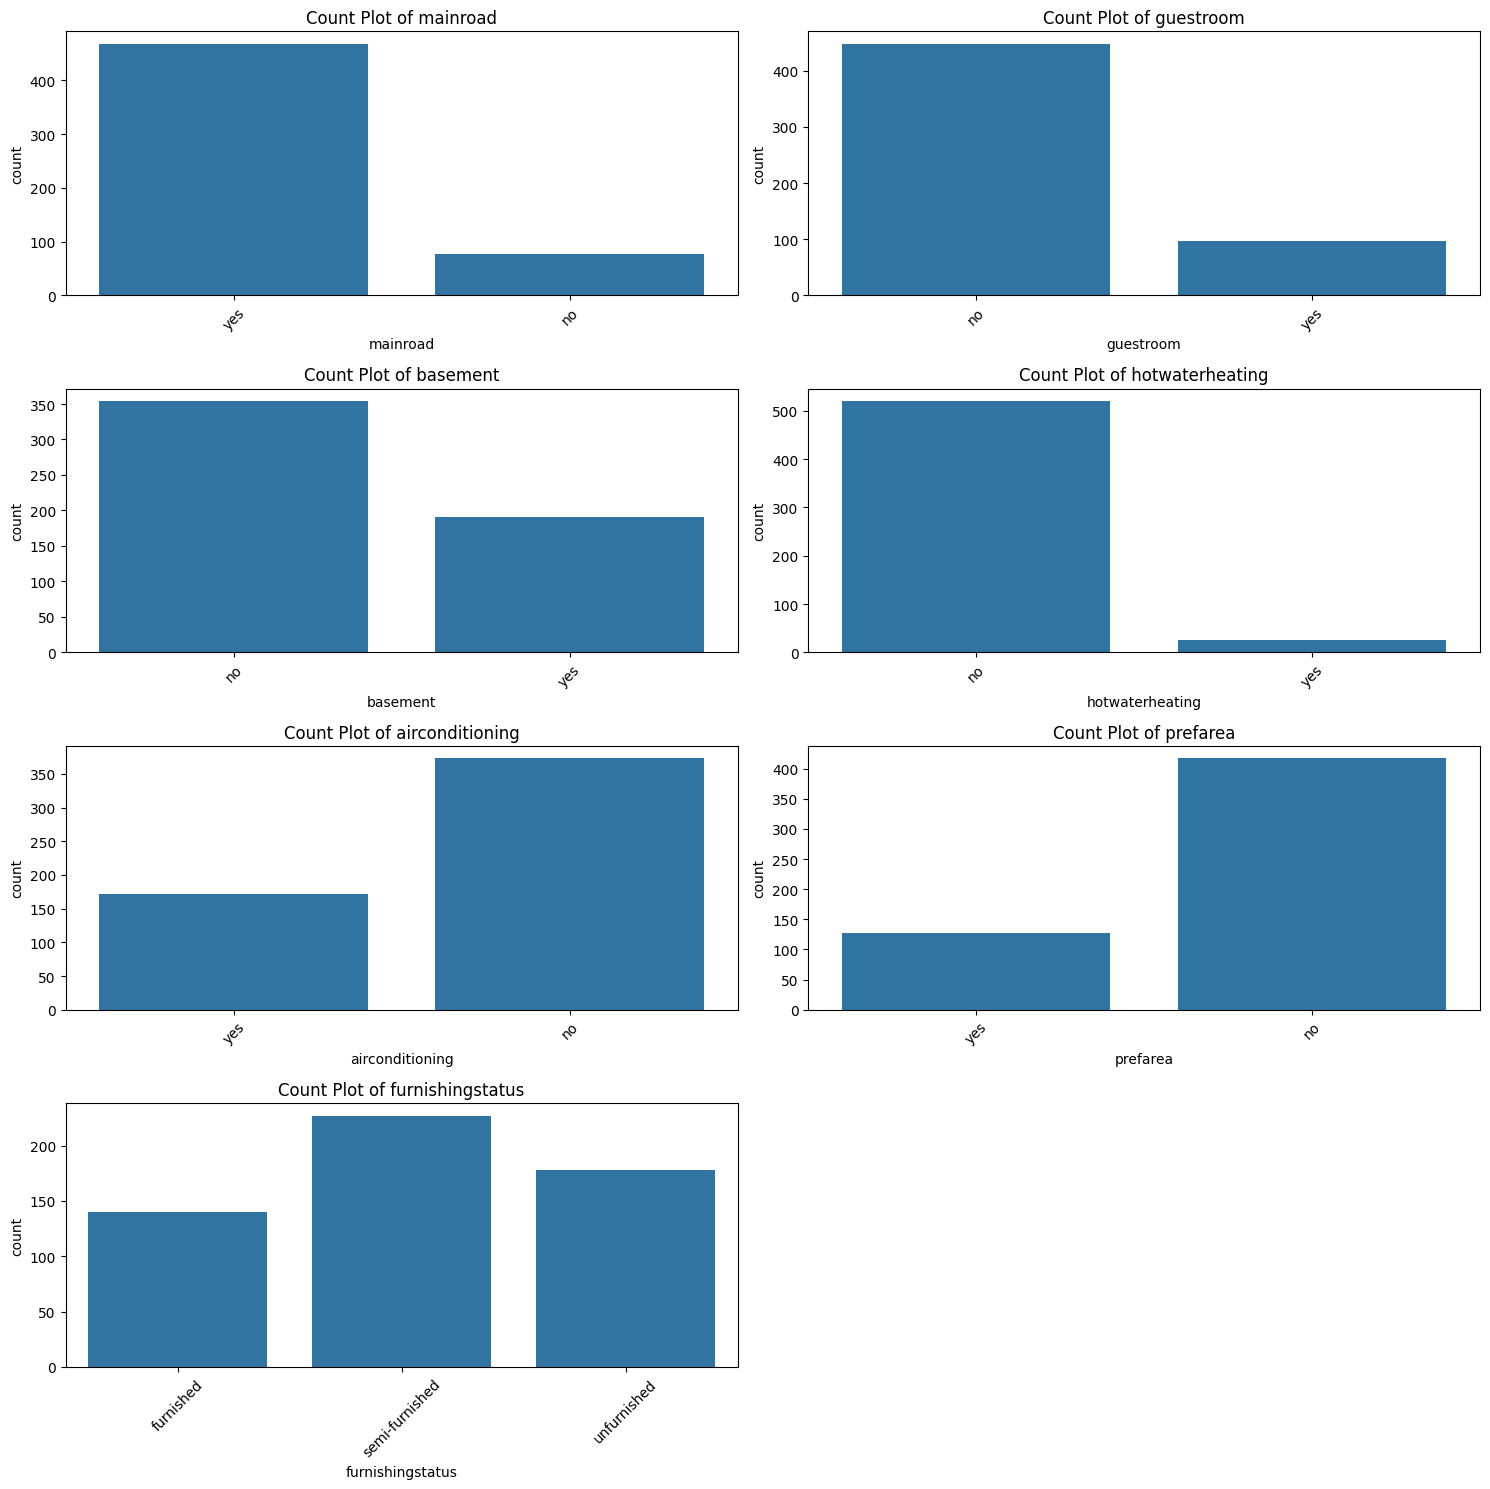

In [ ]:
# Univariate Analysis for Categorical Features
cat_features = df.select_dtypes(include=[object]).columns.tolist()
plt.figure(figsize=(15, 15))
for i, col in enumerate(cat_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['hotwaterheating'].value_counts()

,count
hotwaterheating,
no,520
yes,25


In [ ]:
# Dropping the 'hotwaterheating' column because almost all instances do not have this feature therefore it will not have much impact in model training.
df.drop('hotwaterheating', axis=1, inplace=True)

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [ ]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

# Correlation of numerical features with the target

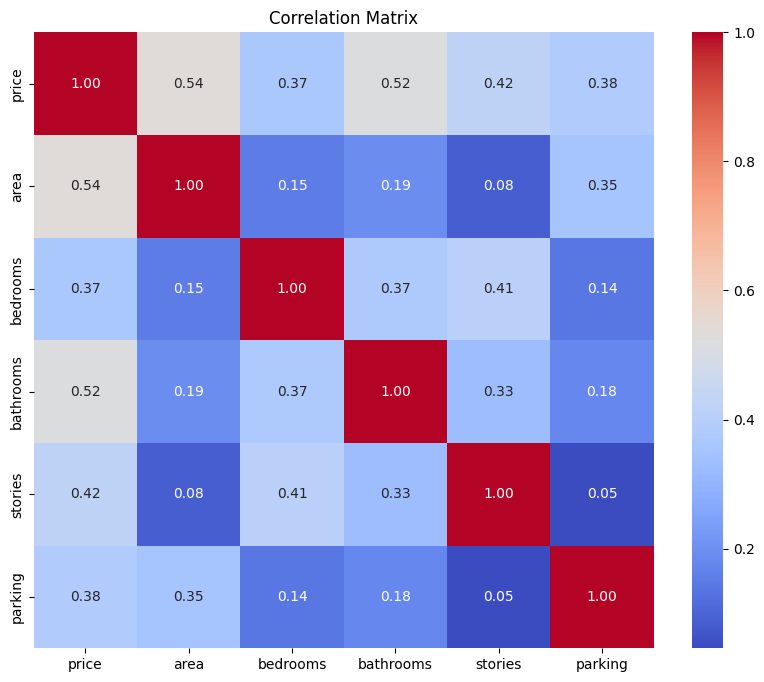

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Numerical features outlier detection

In [ ]:
num_features = df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_features:
    # Calculate IQR for the current column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Number of outliers in '{col}' using IQR: {len(outliers_iqr)}")

Number of outliers in 'price' using IQR: 15
Number of outliers in 'area' using IQR: 12
Number of outliers in 'bedrooms' using IQR: 12
Number of outliers in 'bathrooms' using IQR: 1
Number of outliers in 'stories' using IQR: 41
Number of outliers in 'parking' using IQR: 12


# Dealing with outliers

We will deal with the outliers by capping them instead of totally removing them because the dataset is already too small.

In [ ]:
num_features = df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_features:
    # Calculate quantiles for capping
    Q5 = df[col].quantile(0.05)
    Q95 = df[col].quantile(0.95)

    # Cap outliers
    df[col] = np.where(df[col] < Q5, Q5, df[col])
    df[col] = np.where(df[col] > Q95, Q95, df[col])

print("Outliers in all numerical features have been capped.")

Outliers in all numerical features have been capped.


# Encoding categorical features

In [ ]:
# Binary encode the specified columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# One-hot encode 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,8400000.0,7420.0,4.0,2.0,3.0,1,0,0,1,2.0,1,False,False
1,8400000.0,8960.0,4.0,2.0,4.0,1,0,0,1,2.0,0,False,False
2,8400000.0,9000.0,3.0,2.0,2.0,1,0,1,0,2.0,1,True,False
3,8400000.0,7500.0,4.0,2.0,2.0,1,0,1,1,2.0,1,False,False
4,8400000.0,7420.0,4.0,1.0,2.0,1,1,1,1,2.0,0,False,False


# Stanardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Create a specific list of numerical columns to standardize (excluding the target variable 'price')
num_features_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Apply StandardScaler to the selected numerical columns
df[num_features_to_scale] = scaler.fit_transform(df[num_features_to_scale])

print("Selected numerical features have been scaled using StandardScaler.")

Selected numerical features have been scaled using StandardScaler.


# Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('price', axis=1) # Use all columns except 'price'
y = df['price']

# Split data into training and testing sets
# You can adjust the test_size and random_state as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Data split into training and testing sets.
Training set shape: (436, 12), (436,)
Testing set shape: (109, 12), (109,)


# Training the Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

print("Predictions made on the testing data.")

Predictions made on the testing data.


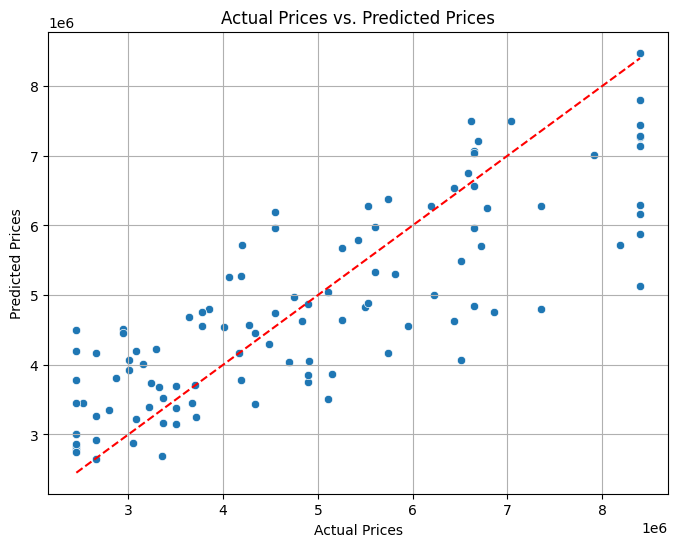

In [ ]:
# Visualize predicted prices compared to actual prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)

# Add a diagonal line for reference (where y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 842476.05
Root Mean Squared Error (RMSE): 1076084.85


# Training with Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(random_state=42) # Using random_state for reproducibility

# Train the model using the training data
gbr_model.fit(X_train, y_train)

print("Gradient Boosting Regressor model trained successfully.")

Gradient Boosting Regressor model trained successfully.


In [ ]:
# Make predictions on the testing data
y_pred_gbr = gbr_model.predict(X_test)

print("Predictions made on the testing data using Gradient Boosting.")

Predictions made on the testing data using Gradient Boosting.


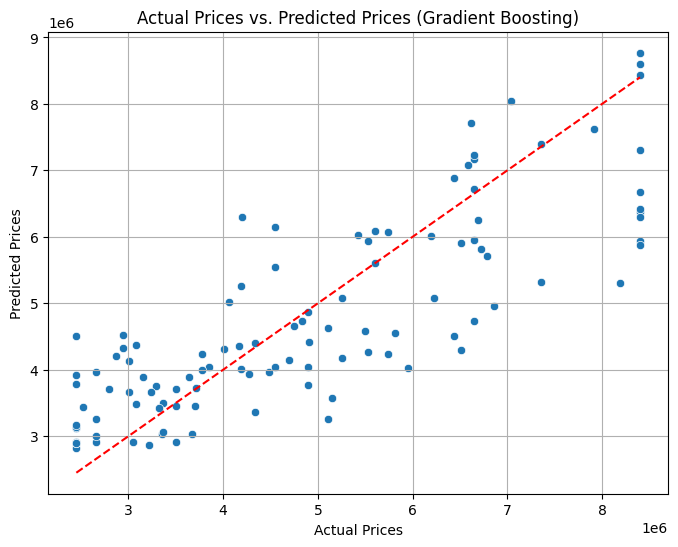

In [ ]:
# Visualize predicted prices compared to actual prices (Gradient Boosting)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr) # Use y_pred_gbr here

# Add a diagonal line for reference (where y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.title('Actual Prices vs. Predicted Prices (Gradient Boosting)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

In [ ]:
# Calculate Mean Absolute Error (MAE) for Gradient Boosting
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

# Calculate Mean Squared Error (MSE) for Gradient Boosting
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

# Calculate Root Mean Squared Error (RMSE) for Gradient Boosting
rmse_gbr = np.sqrt(mse_gbr)

print(f"Gradient Boosting Mean Absolute Error (MAE): {mae_gbr:.2f}")
print(f"Gradient Boosting Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")

Gradient Boosting Mean Absolute Error (MAE): 830134.44
Gradient Boosting Root Mean Squared Error (RMSE): 1068090.66


# Model Results Explanation

Based on the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) calculated for both the Linear Regression and Gradient Boosting Regressor models:

*   **Linear Regression Results:**
    *   Mean Absolute Error (MAE): 842476.05
    *   Root Mean Squared Error (RMSE): 1076084.85
    *   Interpretation: On average, the Linear Regression model's predictions are off by approximately 842,476.05 units from the actual house prices. The RMSE indicates that the standard deviation of the prediction errors is around 1,076,084.85.

*   **Gradient Boosting Regressor Results:**
    *   Mean Absolute Error (MAE): 830134.44
    *   Root Mean Squared Error (RMSE): 1068090.66
    *   Interpretation: On average, the Gradient Boosting Regressor model's predictions are off by approximately 830,134.44 units from the actual house prices. The RMSE for this model is around 1,068,090.66.

*   **Comparison:**
    *   Comparing the two models, the Gradient Boosting Regressor has slightly lower MAE and RMSE values than the Linear Regression model.
    *   This suggests that the Gradient Boosting Regressor model performed marginally better in predicting house prices on this dataset, as indicated by the smaller average prediction errors.